# With New Dataset

In [1]:
import glob
import os
import librosa
import time
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
tess_emotions=['angry','disgust','fear','happy', 'neutral', 'ps', 'sad']

In [3]:
def extract_feature(file_name):
    
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    result = np.array([])
    
    stft = np.abs(librosa.stft(X))
    chromas = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chromas))

    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))

    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128).T, axis=0)
    result = np.hstack((result, mels))
        
    return result

In [4]:
def load_data(): 
    sound, emo =[],[]

    for file in glob.glob("TESS Toronto emotional speech set data/*AF_*/*.wav"):
      #tess toronto emotional speech set data/TESS Toronto emotional speech set data
        file_name=os.path.basename(file)
        emotion=file_name.split("_")[2][:-4] #split and remove .wav
        sound.append(file)
        emo.append(emotion)

    return {"file": sound, "emotion": emo}

In [5]:
start_time = time.time()

Trial_dict = load_data()
# print(Trial_dict )
print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 0.07722163200378418 seconds ---


In [6]:
X = pd.DataFrame(Trial_dict["file"])
y = pd.DataFrame(Trial_dict["emotion"])

In [7]:
len(X)

2800

In [8]:
X.shape, y.shape

((2800, 1), (2800, 1))

In [9]:
y.value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

In [10]:
X_features =[]

for x in tqdm(X[0]):
#     print(x)
    X_features.append(extract_feature(x))
 

100%|█| 2800/2800 [04:35<00:00, 10.18it/s]


In [11]:
X_features = pd.DataFrame(X_features)

In [12]:
y=y.rename(columns= {0: 'emotion'})

In [13]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X_features, y], axis =1)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,emotion
0,0.617867,0.653780,0.431085,0.338207,0.375061,0.380691,0.351609,0.489447,0.511786,0.382193,...,0.000360,0.000290,0.000177,0.000110,0.000069,0.000015,0.000003,2.192895e-07,8.590388e-09,angry
1,0.673547,0.594730,0.374855,0.345801,0.409756,0.443748,0.344707,0.382297,0.377692,0.335287,...,0.000179,0.000126,0.000077,0.000030,0.000014,0.000007,0.000001,1.132696e-07,1.836075e-09,angry
2,0.564367,0.657618,0.460215,0.355069,0.367584,0.387540,0.296714,0.316493,0.391474,0.395263,...,0.000871,0.000464,0.000454,0.000138,0.000043,0.000013,0.000003,1.801937e-07,6.742717e-09,angry
3,0.654799,0.542651,0.390100,0.326782,0.371182,0.391699,0.413297,0.480299,0.483567,0.423777,...,0.000241,0.000225,0.000205,0.000179,0.000087,0.000022,0.000004,3.114627e-07,8.757597e-09,angry
4,0.566742,0.629937,0.509856,0.386924,0.365660,0.338888,0.265869,0.292169,0.352686,0.352873,...,0.000504,0.000281,0.000298,0.000132,0.000038,0.000009,0.000002,8.761903e-08,3.468929e-09,angry


In [15]:
data = data.reindex(np.random.permutation(data.index))

In [16]:
# Storing shuffled ravdess and tess data to avoid loading again
data.to_csv("TESS_FEATURES.csv")

In [17]:
starting_time = time.time()
data = pd.read_csv("TESS_FEATURES.csv")
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.373873233795166ms
   Unnamed: 0         0         1         2         3         4         5  \
0        1852  0.555635  0.627150  0.580239  0.497519  0.474430  0.408345   
1        1380  0.355780  0.339762  0.321227  0.298005  0.299745  0.342849   
2         824  0.234834  0.340382  0.383545  0.214498  0.254162  0.364296   
3         694  0.533369  0.478962  0.427260  0.411472  0.444489  0.581935   
4         132  0.629125  0.369055  0.305814  0.315839  0.336110  0.319943   

          6         7         8  ...       171       172       173       174  \
0  0.448672  0.447244  0.416217  ...  0.067778  0.082636  0.066202  0.025139   
1  0.462188  0.451501  0.393863  ...  0.000038  0.000027  0.000019  0.000009   
2  0.762404  0.754437  0.342012  ...  0.000257  0.000150  0.000067  0.000024   
3  0.546419  0.431803  0.441229  ...  0.000184  0.000178  0.000148  0.000096   
4  0.407228  0.478064  0.416067  ...  0.000410  0.000423  0.000276  0.000161   

        175       176

In [18]:
data.shape

(2800, 182)

In [19]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '171', '172', '173', '174', '175', '176', '177', '178', '179',
       'emotion'],
      dtype='object', length=182)

In [20]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [21]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '171', '172', '173', '174', '175', '176', '177', '178', '179',
       'emotion'],
      dtype='object', length=181)

In [22]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
X.shape, y.shape

((2800, 180), (2800,))

In [25]:
np.unique(y)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
      dtype=object)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

In [28]:
from sklearn.svm import LinearSVC

steps2 = [('scaler', StandardScaler()),
          ('LinearSVM', LinearSVC())]

svml = Pipeline(steps2)

svml_res = svml.fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(svml.score(X_test, y_test)))

Accuracy with Scaling: 0.9785714285714285


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
 import joblib

# Save the trained model to a file
joblib.dump(svml_res, 'svm_model.joblib')

# Load the saved model from the file
svm_loaded = joblib.load('svm_model.joblib')

# Use the loaded model for prediction
svm_loaded.predict(X_test)

array(['happy', 'angry', 'ps', ..., 'happy', 'ps', 'disgust'],
      dtype=object)

In [30]:
svml_train_acc = float(svml_res.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % svml_train_acc)

svml_test_acc = float(svml_res.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % svml_test_acc)

----train accuracy score 100.0 ----
----test accuracy score 97.85714285714285 ----


In [31]:
svml_score = cross_val_score(svml, X, y, cv=cv, n_jobs=-1)
print(svml_score)
print("Average:", np.average(svml_score))

[0.98571429 0.99285714 0.99821429 0.99285714 0.99107143 0.98392857
 0.98571429 0.99285714 0.98214286 0.99642857 0.9875     0.98392857
 0.9875     0.99464286 0.98928571 0.99107143 0.98214286 0.9875
 0.99285714 0.99107143 0.98214286 0.99107143 0.98928571 0.99285714
 0.99464286 0.98392857 0.98928571 0.9875     0.99285714 0.99464286
 0.9875     0.98928571 0.98928571 0.99285714 0.98571429 0.98571429
 0.9875     0.99464286 0.99107143 0.98214286 0.99464286 0.99107143
 0.99821429 0.98571429 0.99107143 0.98928571 0.99464286 0.98928571
 0.99464286 0.98571429]
Average: 0.9897500000000001


In [32]:
svml_pred = svml_res.predict(X_test)
print(svml_pred)

['happy' 'angry' 'ps' ... 'happy' 'ps' 'disgust']


              precision    recall  f1-score   support

       angry       1.00      0.99      0.99       205
     disgust       0.97      1.00      0.98       207
        fear       1.00      0.94      0.97       226
       happy       0.97      0.96      0.97       189
     neutral       0.99      1.00      1.00       192
          ps       0.93      0.97      0.95       196
         sad       1.00      1.00      1.00       185

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400

----accuracy score 97.85714285714285 ----


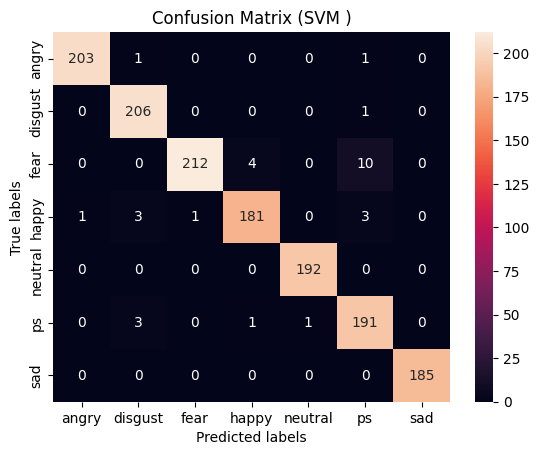

In [33]:
print(classification_report(y_test,svml_pred))

acc_svml = float(accuracy_score(y_test,svml_pred))*100
print("----accuracy score %s ----" % acc_svml)

cm_svml = confusion_matrix(y_test,svml_pred)

# df_cm_svml = pd.DataFrame(cm_svml)
# sn.heatmap(df_cm_svml, annot=True, fmt='')
# plt.show()

ax= plt.subplot()
sns.heatmap(cm_svml, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (SVM )'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

# **MLP Classifier**

In [34]:
from sklearn.neural_network import MLPClassifier

steps3 = [('scaler', StandardScaler()),
        ('MLP', MLPClassifier())]
        
pipeline_mlp = Pipeline(steps3)

mlp = pipeline_mlp.fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(mlp.score(X_test, y_test)))

Accuracy with Scaling: 0.995


In [35]:
mlp_train_acc = float(mlp.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % mlp_train_acc)

mlp_test_acc = float(mlp.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % mlp_train_acc)

----train accuracy score 100.0 ----
----test accuracy score 100.0 ----


In [ ]:
mlp_res = cross_val_score(mlp, X, y, cv=cv, n_jobs=-1)
print(mlp_res)
print("Average:", np.average(mlp_res))

In [ ]:
mlp_pred = mlp.predict(X_test)
print(mlp_pred)

In [ ]:
print(classification_report(y_test,mlp_pred))

acc_mlp = float(accuracy_score(y_test,mlp_pred))*100
print("----accuracy score %s ----" % acc_mlp)

cm_mlp = confusion_matrix(y_test,mlp_pred)

ax= plt.subplot()
sns.heatmap(cm_mlp, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Multi Layer Perceptron)'); 
ax.xaxis.set_ticklabels(tess_emotions);
ax.yaxis.set_ticklabels(tess_emotions);

In [ ]:
# Save the trained model
joblib.dump(mlp, 'mlp_model.joblib')

In [ ]:
# Save the trained model
joblib.dump(svml_res, 'svm_model0-01.pkl')

In [ ]:
import pickle

# Save the model using protocol version 2
with open('mllpp.pkl', 'wb') as f:
    pickle.dump(mlp, f, protocol=2)

In [ ]:
import pickle

# Save the model using protocol version 2
with open('svmm.pkl', 'wb') as f:
    pickle.dump(svml_res, f, protocol=2)